SHAP 시각화를 위한 데이터 준비

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import time
import shap
from catboost import Pool
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingRegressor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

C:\Users\user1\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gwangju_preprocessed = pd.read_csv("Gwangju_preprocess.csv")
busan_preprocessed = pd.read_csv("Busan_preprocess.csv")
daegu_preprocessed = pd.read_csv("Daegu_preprocess.csv")
daejeon_preprocessed = pd.read_csv("Daejeon_preprocess.csv")
incheon_preprocessed = pd.read_csv("Incheon_preprocess.csv")
seoul_preprocessed = pd.read_csv("Seoul_preprocess.csv")

In [3]:
gwangju_train = gwangju_preprocessed.iloc[:24112, :]
gwangju_val = gwangju_preprocessed.iloc[24112:32142, :]
gwangju_test = gwangju_preprocessed.iloc[32142:, :]
gwangju_train_val = gwangju_preprocessed.iloc[:32142, :]

busan_train = busan_preprocessed.iloc[:24112, :]
busan_val = busan_preprocessed.iloc[24112:32142, :]
busan_test = busan_preprocessed.iloc[32142:, :]
busan_train_val = busan_preprocessed.iloc[:32142, :]

daegu_train = daegu_preprocessed.iloc[:24112, :]
daegu_val = daegu_preprocessed.iloc[24112:32142, :]
daegu_test = daegu_preprocessed.iloc[32142:, :]
daegu_train_val = daegu_preprocessed.iloc[:32142, :]

daejeon_train = daejeon_preprocessed.iloc[:24112, :]
daejeon_val = daejeon_preprocessed.iloc[24112:32142, :]
daejeon_test = daejeon_preprocessed.iloc[32142:, :]
daejeon_train_val = daejeon_preprocessed.iloc[:32142, :]

incheon_train = incheon_preprocessed.iloc[:24112, :]
incheon_val = incheon_preprocessed.iloc[24112:32142, :]
incheon_test = incheon_preprocessed.iloc[32142:, :]
incheon_train_val = incheon_preprocessed.iloc[:32142, :]

seoul_train = seoul_preprocessed.iloc[:24112, :]
seoul_val = seoul_preprocessed.iloc[24112:32142, :]
seoul_test = seoul_preprocessed.iloc[32142:, :]
seoul_train_val = seoul_preprocessed.iloc[:32142, :]


코드 실행시 각 지역을 한작업으로 수행합니다. 총 6작업으로 나누어 진행하였습니다.

1.작업 지역 선택

In [4]:
# Gwangju
X_train_rf_gbm = gwangju_train.drop(columns=['Solar'])
y_train_rf_gbm = gwangju_train['Solar']
X_val_rf_gbm = gwangju_val.drop(columns=['Solar'])
y_val_rf_gbm = gwangju_val['Solar']
X_test_rf_gbm = gwangju_test.drop(columns=['Solar'])
y_test_rf_gbm = gwangju_test['Solar']
X_train_val_rf_gbm = gwangju_train_val.drop(columns=['Solar'])
y_train_val_rf_gbm = gwangju_train_val['Solar']

In [4]:
# Busan
X_train_rf_gbm = busan_train.drop(columns=['Solar'])
y_train_rf_gbm = busan_train['Solar']
X_val_rf_gbm = busan_val.drop(columns=['Solar'])
y_val_rf_gbm = busan_val['Solar']
X_test_rf_gbm = busan_test.drop(columns=['Solar'])
y_test_rf_gbm = busan_test['Solar']
X_train_val_rf_gbm = busan_train_val.drop(columns=['Solar'])
y_train_val_rf_gbm = busan_train_val['Solar']

In [4]:
# Daegu
X_train_rf_gbm = daegu_train.drop(columns=['Solar'])
y_train_rf_gbm = daegu_train['Solar']
X_val_rf_gbm = daegu_val.drop(columns=['Solar'])
y_val_rf_gbm = daegu_val['Solar']
X_test_rf_gbm = daegu_test.drop(columns=['Solar'])
y_test_rf_gbm = daegu_test['Solar']
X_train_val_rf_gbm = daegu_train_val.drop(columns=['Solar'])
y_train_val_rf_gbm = daegu_train_val['Solar']

In [4]:
# Daejeon
X_train_rf_gbm = daejeon_train.drop(columns=['Solar'])
y_train_rf_gbm = daejeon_train['Solar']
X_val_rf_gbm = daejeon_val.drop(columns=['Solar'])
y_val_rf_gbm = daejeon_val['Solar']
X_test_rf_gbm = daejeon_test.drop(columns=['Solar'])
y_test_rf_gbm = daejeon_test['Solar']
X_train_val_rf_gbm = daejeon_train_val.drop(columns=['Solar'])
y_train_val_rf_gbm = daejeon_train_val['Solar']

In [4]:
# Incheon
X_train_rf_gbm = incheon_train.drop(columns=['Solar'])
y_train_rf_gbm = incheon_train['Solar']
X_val_rf_gbm = incheon_val.drop(columns=['Solar'])
y_val_rf_gbm = incheon_val['Solar']
X_test_rf_gbm = incheon_test.drop(columns=['Solar'])
y_test_rf_gbm = incheon_test['Solar']
X_train_val_rf_gbm = incheon_train_val.drop(columns=['Solar'])
y_train_val_rf_gbm = incheon_train_val['Solar']

In [4]:
# Seoul
X_train_rf_gbm = seoul_train.drop(columns=['Solar'])
y_train_rf_gbm = seoul_train['Solar']
X_val_rf_gbm = seoul_val.drop(columns=['Solar'])
y_val_rf_gbm = seoul_val['Solar']
X_test_rf_gbm = seoul_test.drop(columns=['Solar'])
y_test_rf_gbm = seoul_test['Solar']
X_train_val_rf_gbm = seoul_train_val.drop(columns=['Solar'])
y_train_val_rf_gbm = seoul_train_val['Solar']

모든 지역 공통

In [5]:
#  <<공통>> XGBoost, Lightgbm, CatBoost를 위한 데이터 준비
import xgboost as xgb

# 범주형 변수 설정
dtrain = xgb.DMatrix(X_train_rf_gbm, label=y_train_rf_gbm)
dval = xgb.DMatrix(X_val_rf_gbm, label=y_val_rf_gbm)
dtest = xgb.DMatrix(X_test_rf_gbm, label=y_test_rf_gbm)
dtrain_val = xgb.DMatrix(X_train_val_rf_gbm, label=y_train_val_rf_gbm)


import lightgbm as lgb

ltrain = lgb.Dataset(X_train_rf_gbm, label=y_train_rf_gbm)
lval = lgb.Dataset(X_val_rf_gbm, label=y_val_rf_gbm)
ltest = lgb.Dataset(X_test_rf_gbm, label=y_test_rf_gbm)
ltrain_val = lgb.Dataset(X_train_val_rf_gbm, label=y_train_val_rf_gbm)

import catboost as cb

ctrain = cb.Pool(data=X_train_rf_gbm, label=y_train_rf_gbm)
cval = cb.Pool(data=X_val_rf_gbm, label=y_val_rf_gbm)
ctest = cb.Pool(data=X_test_rf_gbm, label=y_test_rf_gbm)
ctrain_val = cb.Pool(data=X_train_val_rf_gbm, label=y_train_val_rf_gbm)


2. 모델 로드

In [6]:
#catboost만
gwangju_model_cat = joblib.load("./model-/gwangju_cat.pkl")
busan_model_cat = joblib.load("./model-/busan_cat.pkl")
daegu_model_cat = joblib.load("./model-/daegu_cat.pkl")
daejeon_model_cat = joblib.load("./model-/daejeon_cat.pkl")
incheon_model_cat = joblib.load("./model-/incheon_cat.pkl")
seoul_model_cat = joblib.load("./model-/seoul_cat.pkl")

In [7]:
# 지역별 모델 로드
# 광주
gwangju_model_rf = joblib.load("./gwangju_rf_opt.pkl")
gwangju_model_gbm = joblib.load("./gwangju_gbm_opt.pkl")
gwangju_model_xgb = joblib.load("./gwangju_xgb_opt.pkl")
gwangju_model_lgb = joblib.load("./gwangju_lgb_opt.pkl")
gwangju_model_cat = joblib.load("./gwangju_cat_opt.pkl")

# 부산
busan_model_rf = joblib.load("./busan_rf_opt.pkl")
busan_model_gbm = joblib.load("./busan_gbm_opt.pkl")
busan_model_xgb = joblib.load("./busan_xgb_opt.pkl")
busan_model_lgb = joblib.load("./busan_lgb_opt.pkl")
busan_model_cat = joblib.load("./busan_cat_opt.pkl")

# 대구
daegu_model_rf = joblib.load("./daegu_rf_opt.pkl")
daegu_model_gbm = joblib.load("./daegu_gbm_opt.pkl")
daegu_model_xgb = joblib.load("./daegu_xgb_opt.pkl")
daegu_model_lgb = joblib.load("./daegu_lgb_opt.pkl")
daegu_model_cat = joblib.load("./daegu_cat_opt.pkl")

# 대전
daejeon_model_rf = joblib.load("./daejeon_rf_opt.pkl")
daejeon_model_gbm = joblib.load("./daejeon_gbm_opt.pkl")
daejeon_model_xgb = joblib.load("./daejeon_xgb_opt.pkl")
daejeon_model_lgb = joblib.load("./daejeon_lgb_opt.pkl")
daejeon_model_cat = joblib.load("./daejeon_cat_opt.pkl")

# 인천
incheon_model_rf = joblib.load("./incheon_rf_opt.pkl")
incheon_model_gbm = joblib.load("./incheon_gbm_opt.pkl")
incheon_model_xgb = joblib.load("./incheon_xgb_opt.pkl")
incheon_model_lgb = joblib.load("./incheon_lgb_opt.pkl")
incheon_model_cat = joblib.load("./incheon_cat_opt.pkl")

# 서울
seoul_model_rf = joblib.load("./seoul_rf_opt.pkl")
seoul_model_gbm = joblib.load("./seoul_gbm_opt.pkl")
seoul_model_xgb = joblib.load("./seoul_xgb_opt.pkl")
seoul_model_lgb = joblib.load("./seoul_lgb_opt.pkl")
seoul_model_cat = joblib.load("./seoul_cat_opt.pkl")

FileNotFoundError: [Errno 2] No such file or directory: './gwangju_rf_opt.pkl'

3. shap summary plot - 시각화 지역 선택

In [ ]:
#광주

#rf
gwangju_rf_explainer = shap.TreeExplainer(gwangju_model_rf)
gwangju_rf_shap_values = gwangju_rf_explainer.shap_values(X_train_val_rf_gbm)
shap.summary_plot(gwangju_rf_shap_values, X_train_val_rf_gbm, show=False)
plt.savefig('./gwangju_vis/summary_gwangju_rf_plot.png', dpi=1000, bbox_inches='tight')

In [ ]:
#gbm
gwangju_gbm_explainer = shap.TreeExplainer(gwangju_model_gbm)
gwangju_gbm_shap_values = gwangju_gbm_explainer.shap_values(X_train_val_rf_gbm)
shap.summary_plot(gwangju_gbm_shap_values, X_train_val_rf_gbm, show=False)
plt.savefig('./gwangju_vis/summary_gwangju_gbm_plot.png', dpi=1000, bbox_inches='tight')

In [ ]:
#xgboost
gwangju_xgb_explainer = shap.TreeExplainer(gwangju_model_xgb)
gwangju_xgb_shap_values = gwangju_xgb_explainer.shap_values(X_train_val_rf_gbm)
shap.summary_plot(gwangju_xgb_shap_values, X_train_val_rf_gbm, show=False)
plt.savefig('./gwangju_vis/summary_gwangju_xgb_plot.png', dpi=1000, bbox_inches='tight')

In [ ]:
#lightgbm
gwangju_lgb_explainer = shap.TreeExplainer(gwangju_model_lgb)
gwangju_lgb_shap_values = gwangju_lgb_explainer.shap_values(X_train_val_rf_gbm)
shap.summary_plot(gwangju_lgb_shap_values, X_train_val_rf_gbm, show=False)
plt.savefig('./gwangju_vis/summary_gwangju_lgb_plot.png', dpi=1000, bbox_inches='tight')

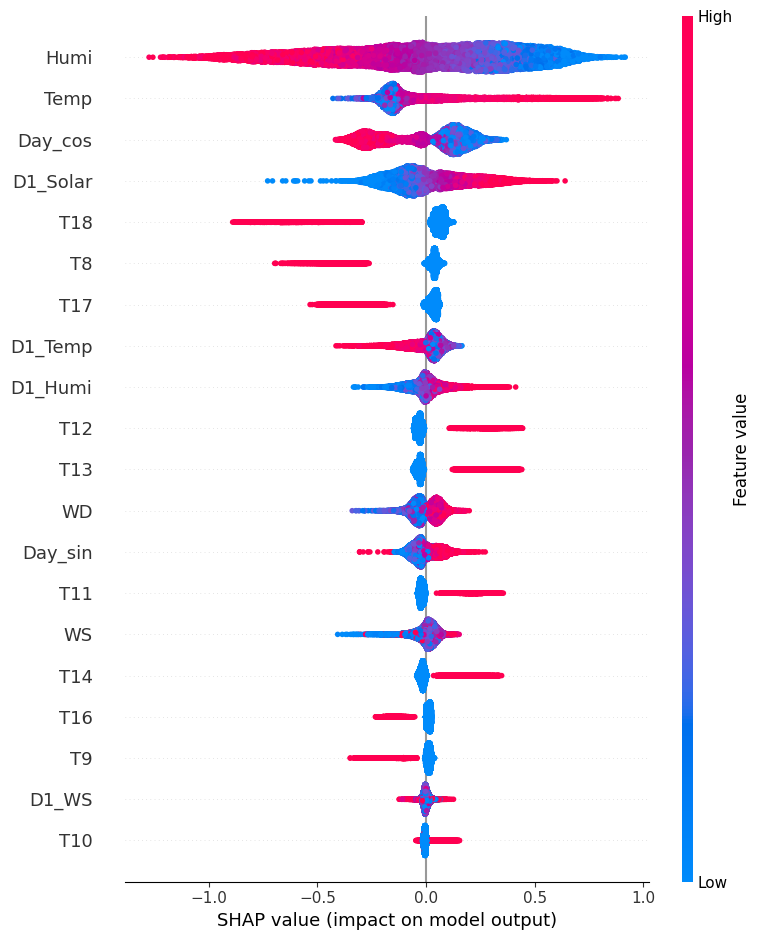

In [7]:
#광주_catboost_summary
gwangju_cat_explainer = shap.TreeExplainer(gwangju_model_cat)
gwangju_cat_shap_values = gwangju_cat_explainer.shap_values(X_train_val_rf_gbm)
shap.summary_plot(gwangju_cat_shap_values, X_train_val_rf_gbm, show=False)
plt.savefig('./cat vis/gwangju_cat_plot.png', dpi=1000, bbox_inches='tight')

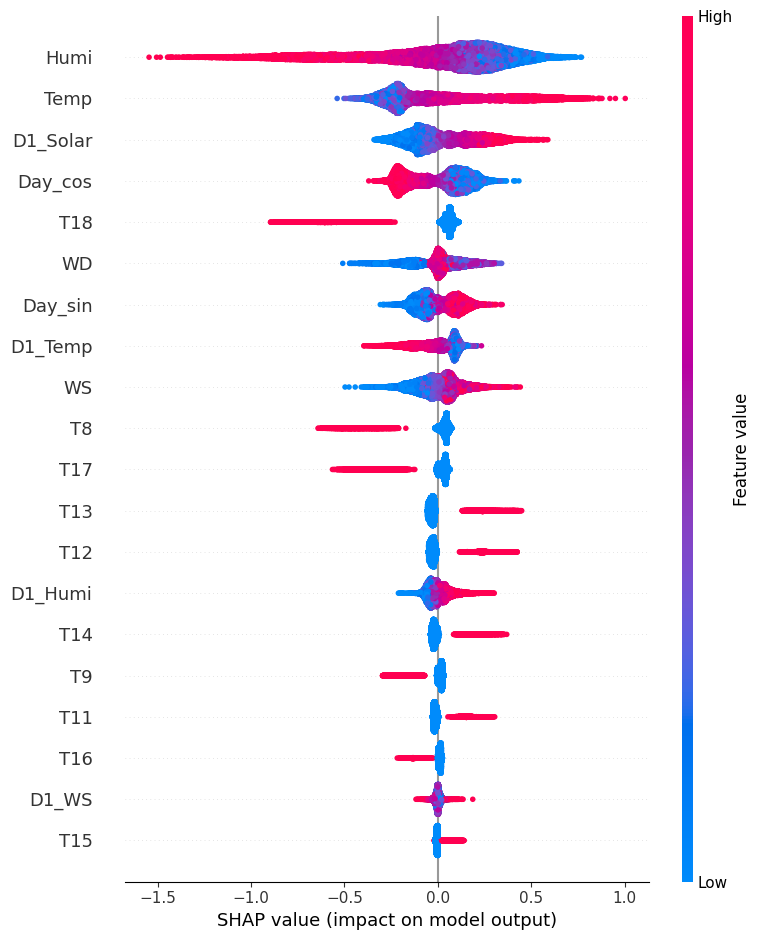

In [7]:
#부산_catboost_summary
busan_cat_explainer = shap.TreeExplainer(busan_model_cat)
busan_cat_shap_values = busan_cat_explainer.shap_values(X_train_val_rf_gbm)
shap.summary_plot(busan_cat_shap_values, X_train_val_rf_gbm, show=False)
plt.savefig('./cat vis/busan_cat_plot.png', dpi=1000, bbox_inches='tight')

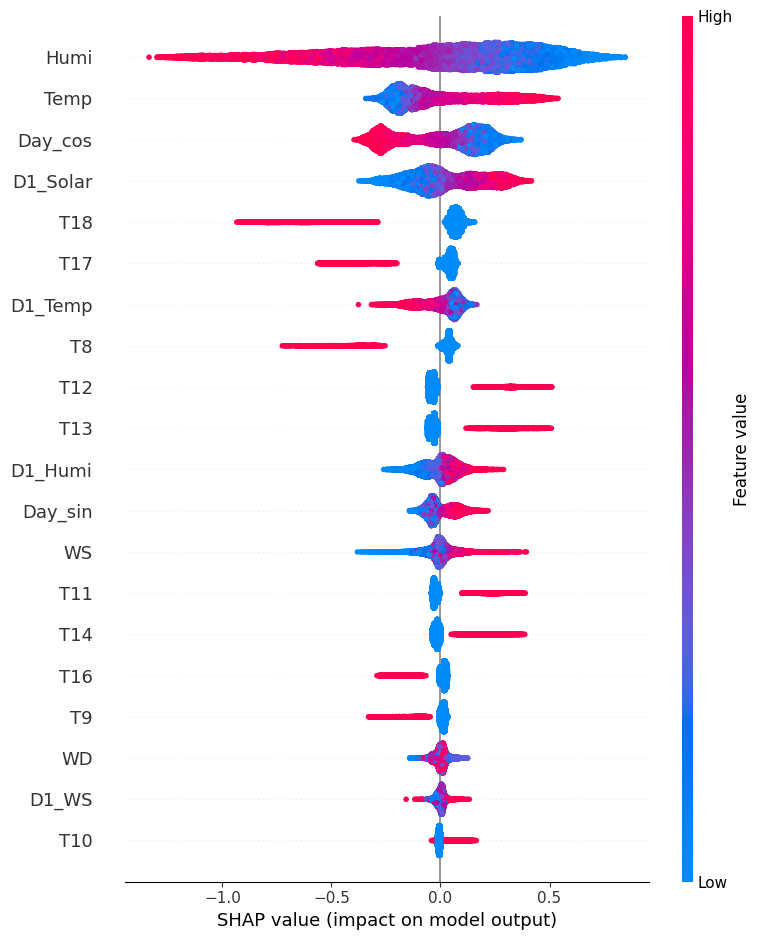

In [7]:
#대구_catboost_summary
daegu_cat_explainer = shap.TreeExplainer(daegu_model_cat)
daegu_cat_shap_values = daegu_cat_explainer.shap_values(X_train_val_rf_gbm)
shap.summary_plot(daegu_cat_shap_values, X_train_val_rf_gbm, show=False)
plt.savefig('./cat vis/daegu_cat_plot.png', dpi=1000, bbox_inches='tight')

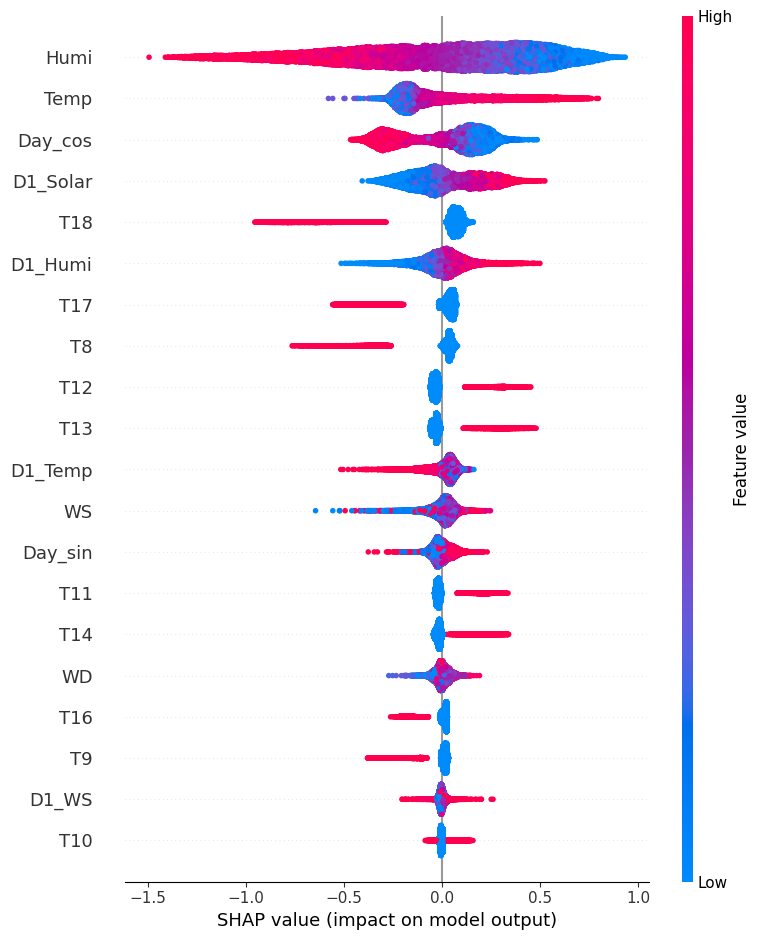

In [7]:
#대전_catboost_summary
daejeon_cat_explainer = shap.TreeExplainer(daejeon_model_cat)
daejeon_cat_shap_values = daejeon_cat_explainer.shap_values(X_train_val_rf_gbm)
shap.summary_plot(daejeon_cat_shap_values, X_train_val_rf_gbm, show=False)
plt.savefig('./cat vis/daejeon_cat_plot.png', dpi=1000, bbox_inches='tight')

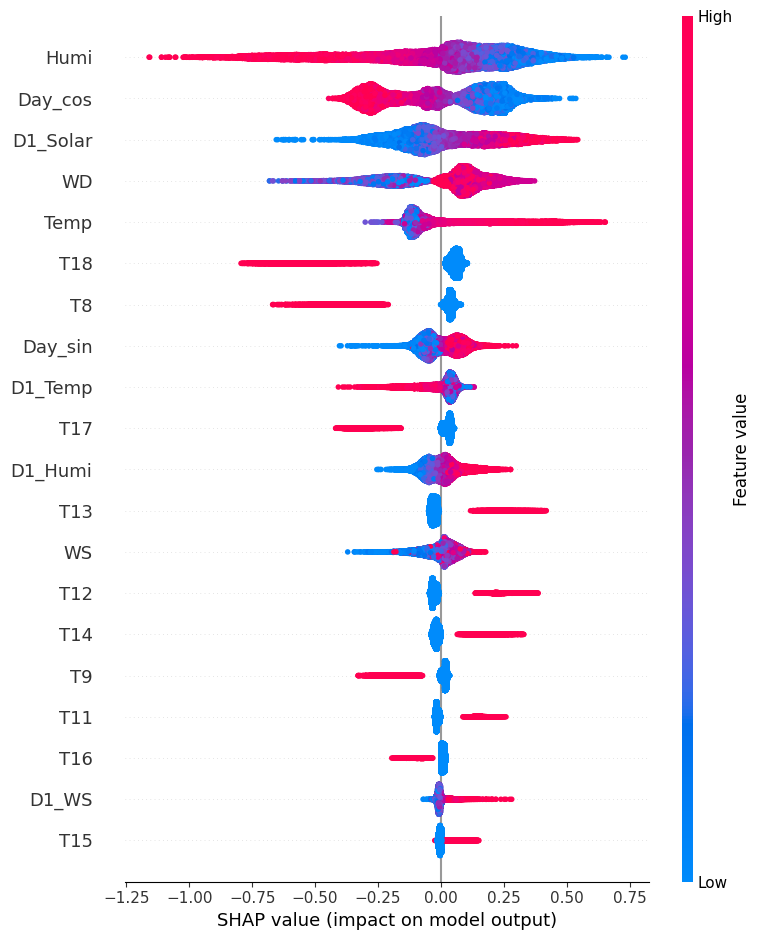

In [7]:
#인천_catboost_summary
incheon_cat_explainer = shap.TreeExplainer(incheon_model_cat)
incheon_cat_shap_values = incheon_cat_explainer.shap_values(X_train_val_rf_gbm)
shap.summary_plot(incheon_cat_shap_values, X_train_val_rf_gbm, show=False)
plt.savefig('./cat vis/incheon_cat_plot.png', dpi=1000, bbox_inches='tight')

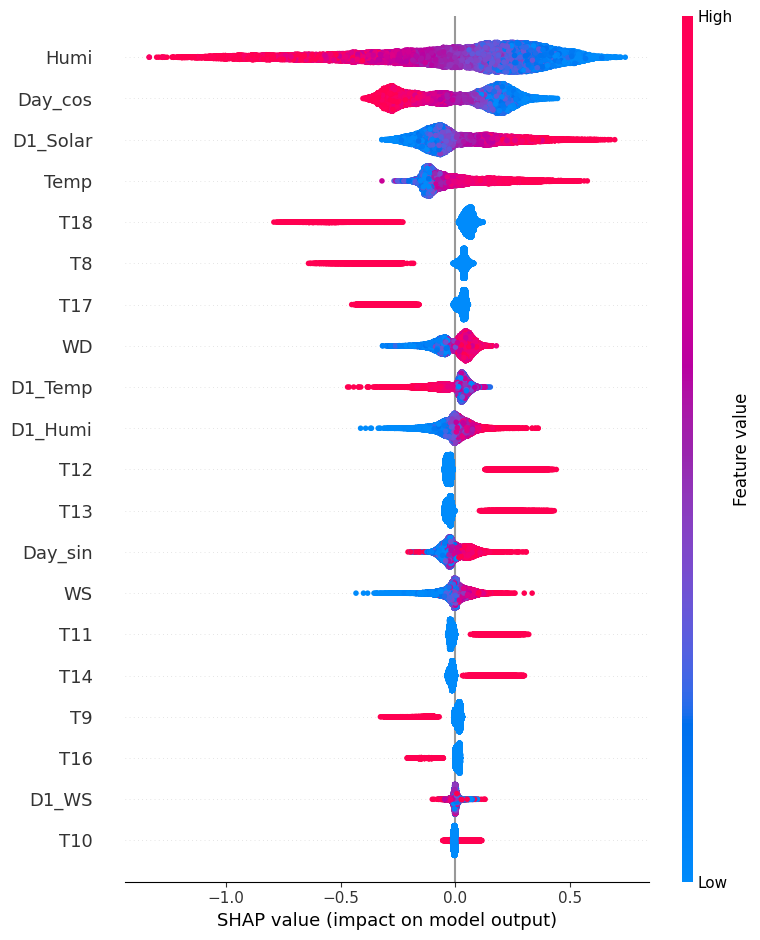

In [7]:
#서울_catboost_summary
seoul_cat_explainer = shap.TreeExplainer(seoul_model_cat)
seoul_cat_shap_values = seoul_cat_explainer.shap_values(X_train_val_rf_gbm)
shap.summary_plot(seoul_cat_shap_values, X_train_val_rf_gbm, show=False)
plt.savefig('./cat vis/seoul_cat_plot.png', dpi=1000, bbox_inches='tight')

4. shap decision plot_low,high - 시각화 지역 선택

In [7]:
# catboost 모델 decision plot-low,high 함수 정의 

def decision_high_low_catboost(model, X_test, test_data, explainer, dataset_name, output_path):
    
    # 예측 수행
    predictions = model.predict(test_data)
    max_prediction = max(predictions)
    min_prediction = min(predictions)

    # 최고/최저 예측값의 인덱스 찾기
    max_index = np.argmax(predictions)
    min_index = np.argmin(predictions)

    # 최고/최저 예측값의 특징 추출
    high_ob = X_test.iloc[[max_index]]
    low_ob = X_test.iloc[[min_index]]

    # SHAP 값 계산
    shap_values_high = explainer.shap_values(high_ob)
    shap_values_low = explainer.shap_values(low_ob)

    # plot 함수 정의
    def plot_and_save_decision_plot(shap_values, instance, title, filename):
        shap.decision_plot(explainer.expected_value, shap_values, instance, show=False, ignore_warnings=True)
        plt.title(title)
        plt.savefig(filename, dpi=1000, bbox_inches='tight')
        plt.show()

    # 최고 예측값에 대한 시각화
    plot_and_save_decision_plot(
        shap_values_high,
        high_ob,
        f"SHAP Decision Plot for Max Prediction ({dataset_name})",
        f"{output_path}/decision_high_{dataset_name}.png"
    )

    # 최저 예측값에 대한 시각화
    plot_and_save_decision_plot(
        shap_values_low,
        low_ob,
        f"SHAP Decision Plot for Min Prediction ({dataset_name})",
        f"{output_path}/decision_low_{dataset_name}.png"
    )

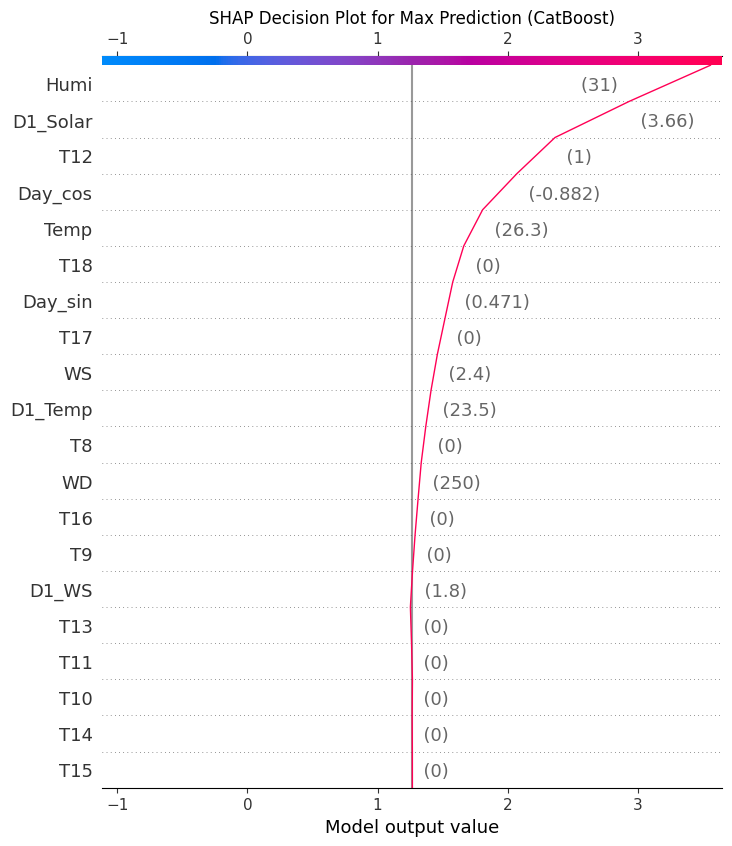

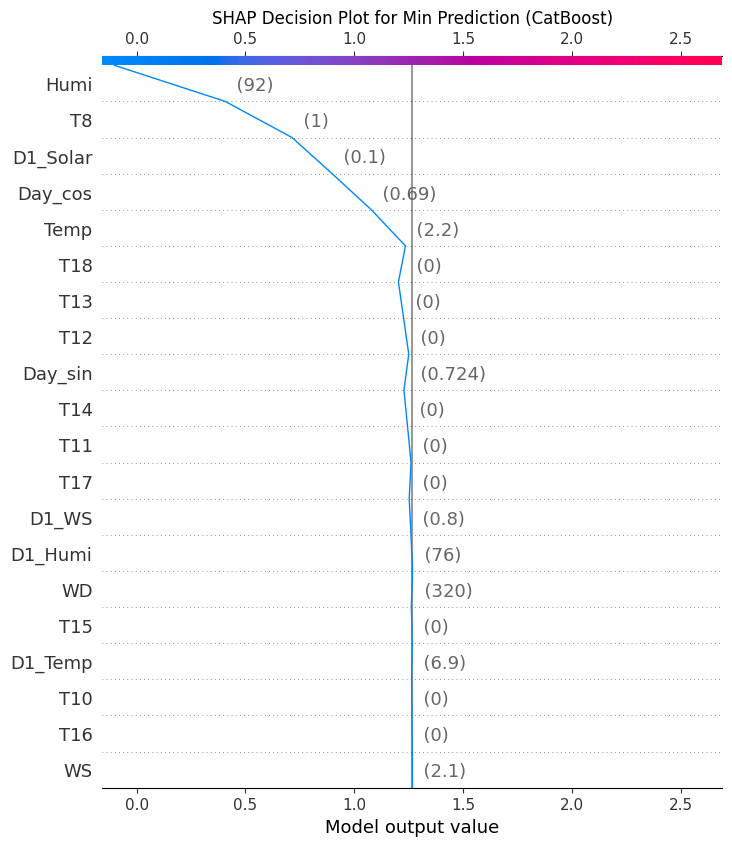

In [18]:
# 광주_catboost_decision
decision_high_low_catboost(gwangju_model_cat, X_test_rf_gbm, ctest, gwangju_cat_explainer, "CatBoost","./gwangju_vis")

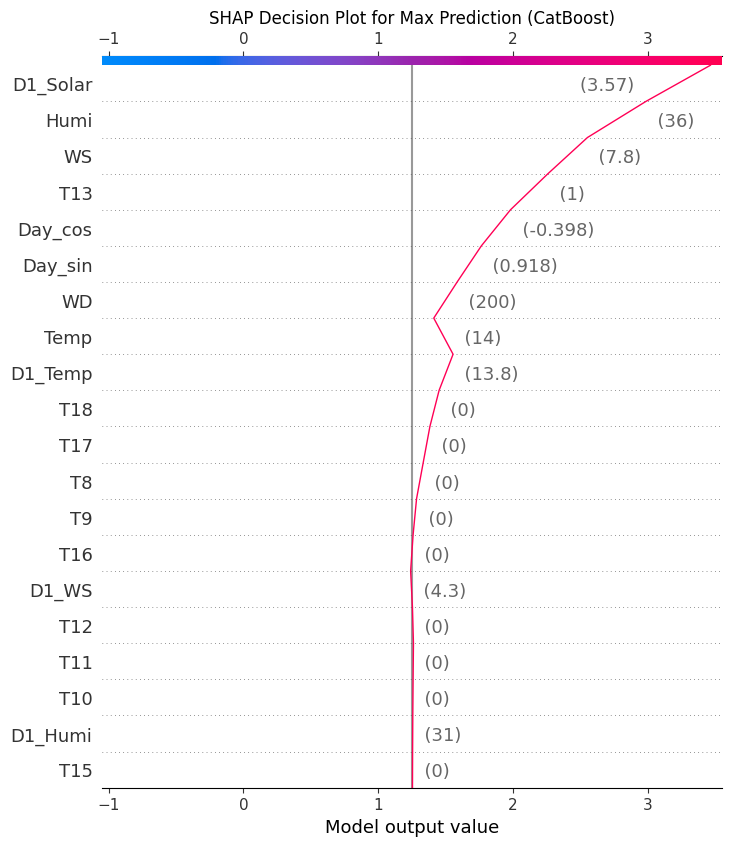

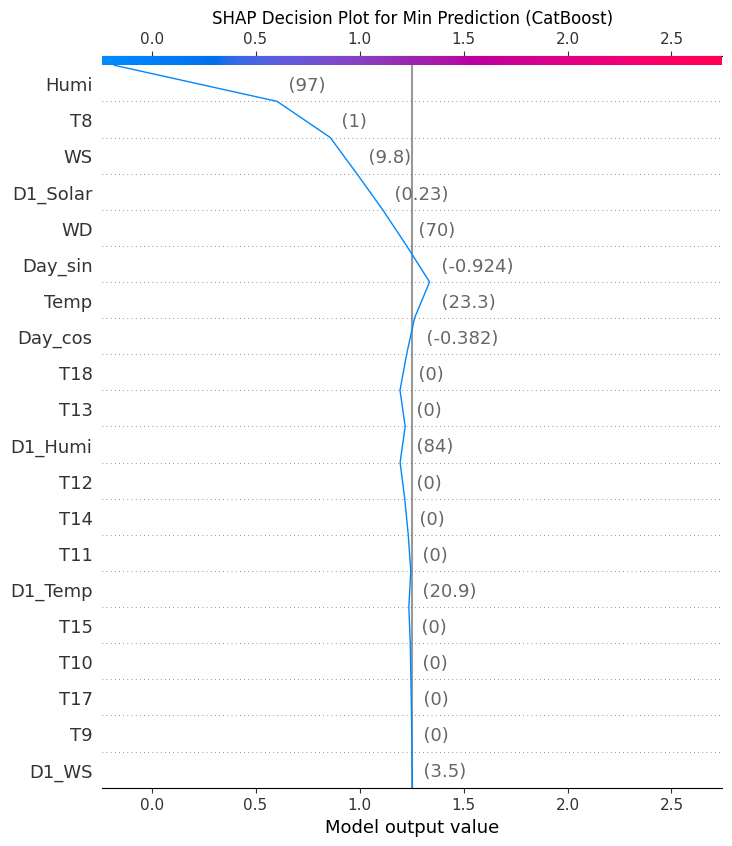

In [8]:
# 부산_catboost_decision
decision_high_low_catboost(busan_model_cat, X_test_rf_gbm, ctest, busan_cat_explainer, "CatBoost", "./busan_vis")

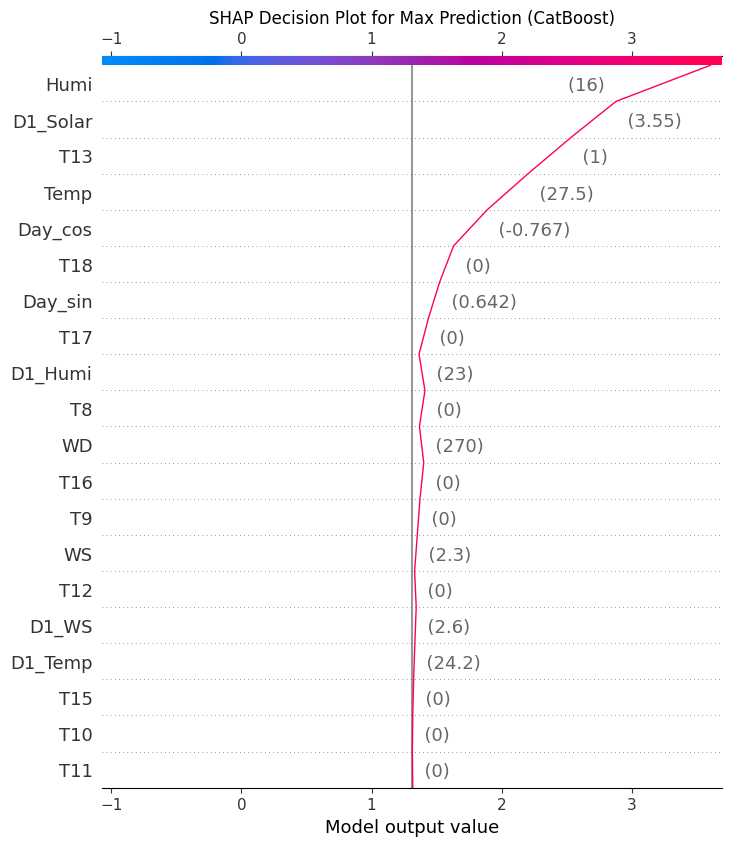

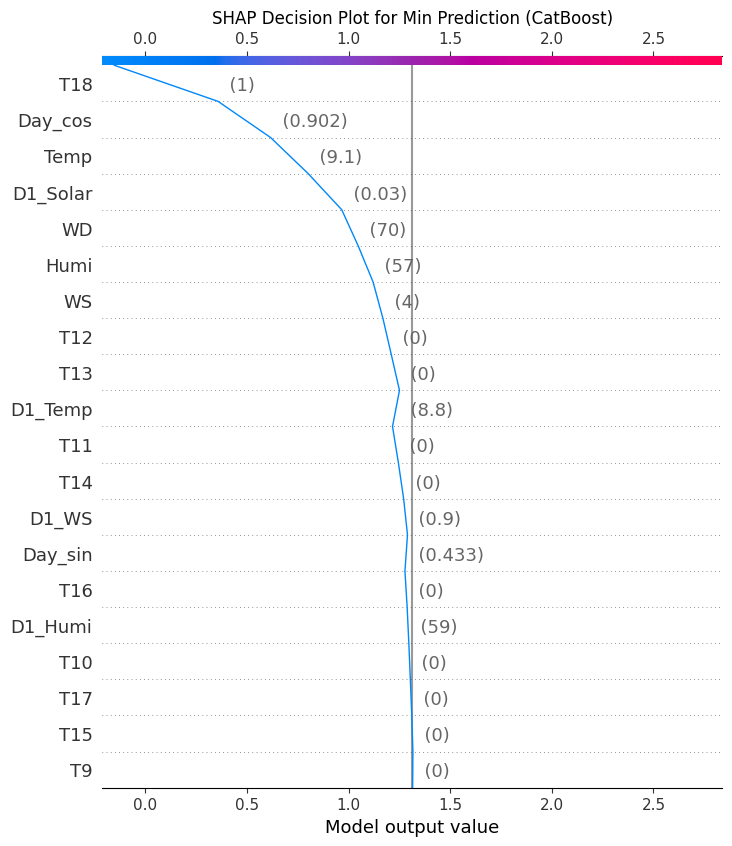

In [8]:
# 대구_catboost_decision 
decision_high_low_catboost(daegu_model_cat, X_test_rf_gbm, ctest, daegu_cat_explainer, "CatBoost", "./daegu_vis")

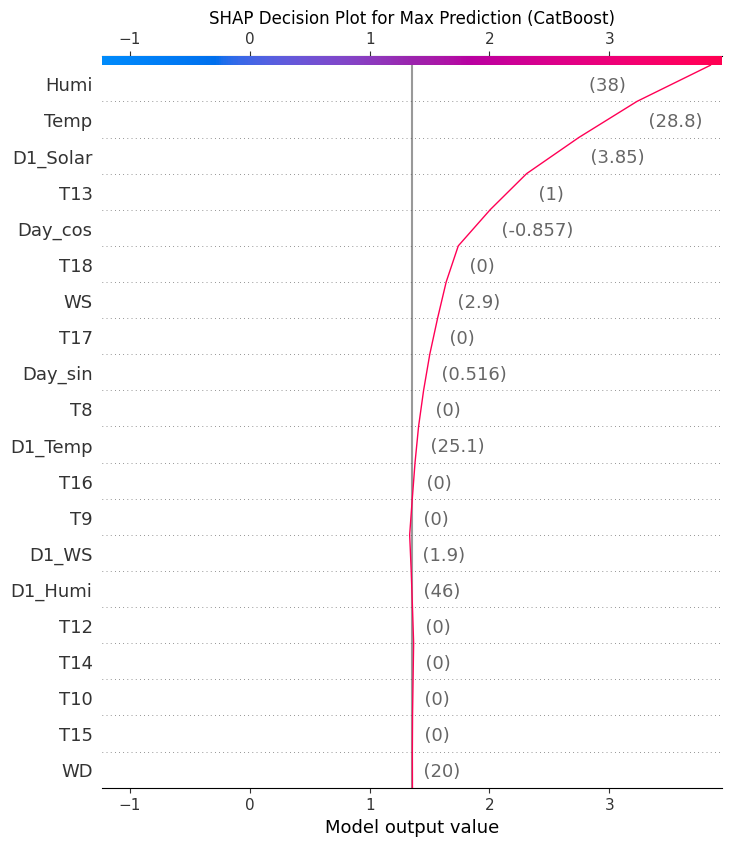

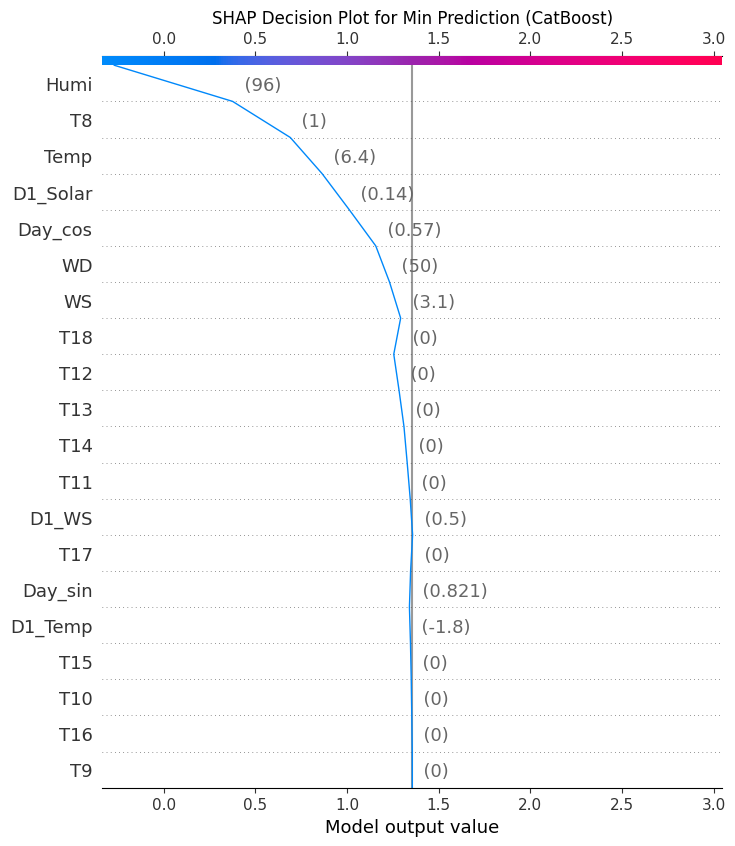

In [8]:
# 대전_catboost_decision 
decision_high_low_catboost(daejeon_model_cat, X_test_rf_gbm, ctest, daejeon_cat_explainer, "CatBoost", "./daejeon_vis")

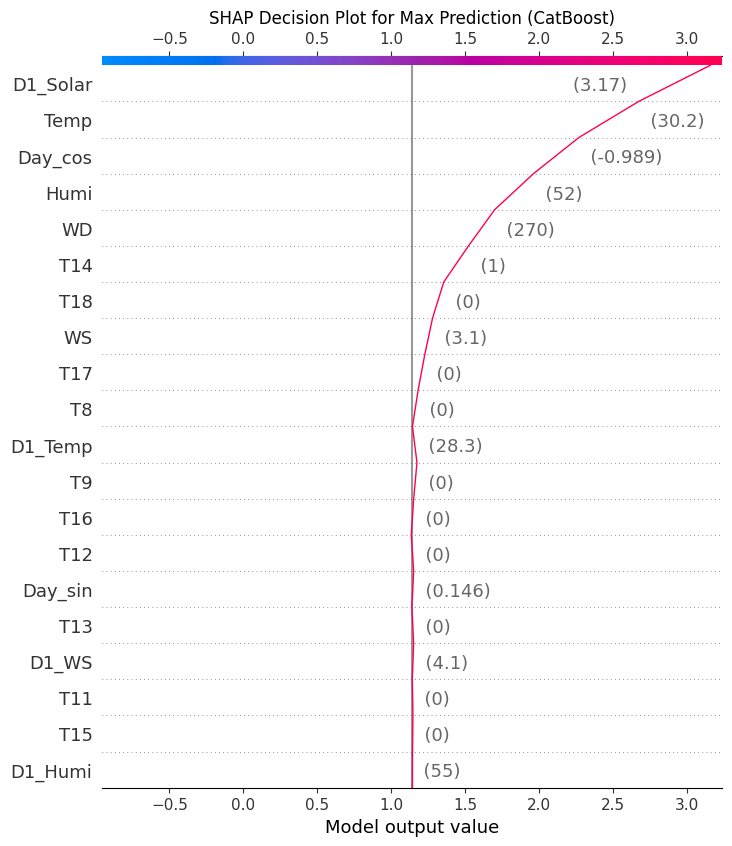

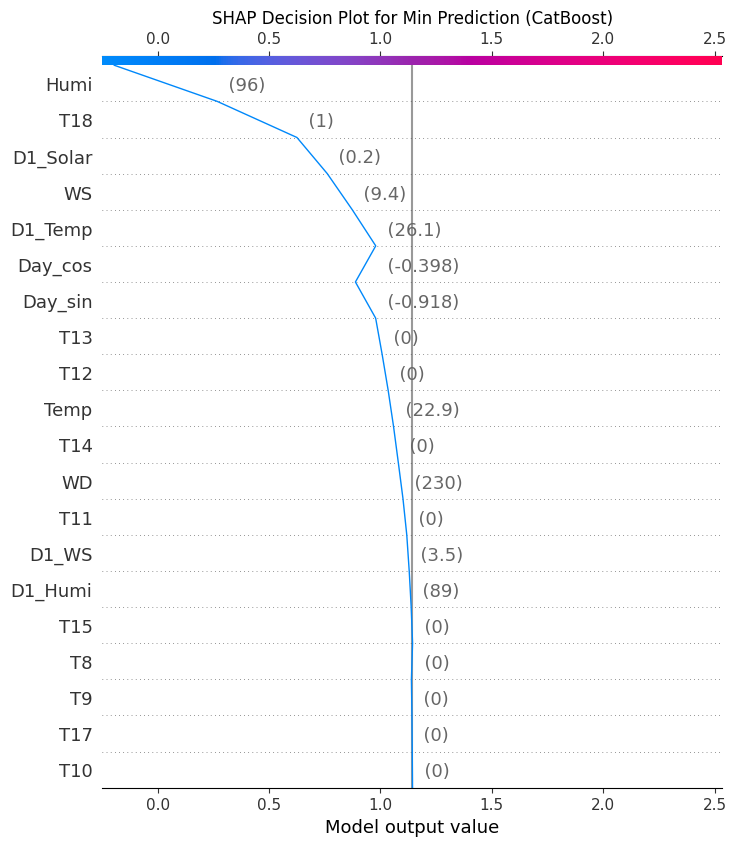

In [10]:
# 인천_catboost_decision 
decision_high_low_catboost(incheon_model_cat,X_test_rf_gbm, ctest, incheon_cat_explainer, "CatBoost", "./incheon_vis")

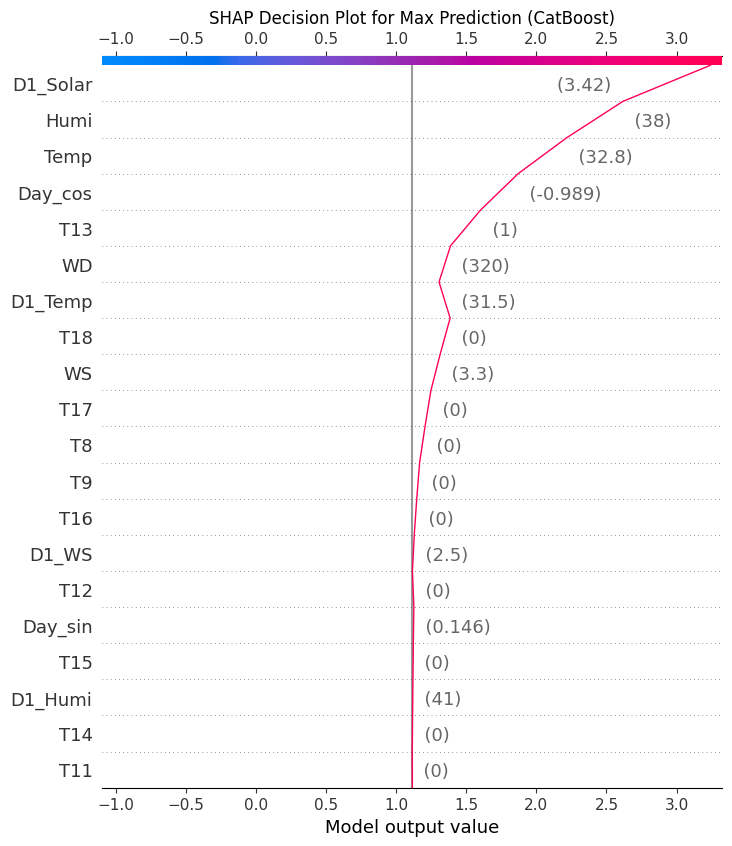

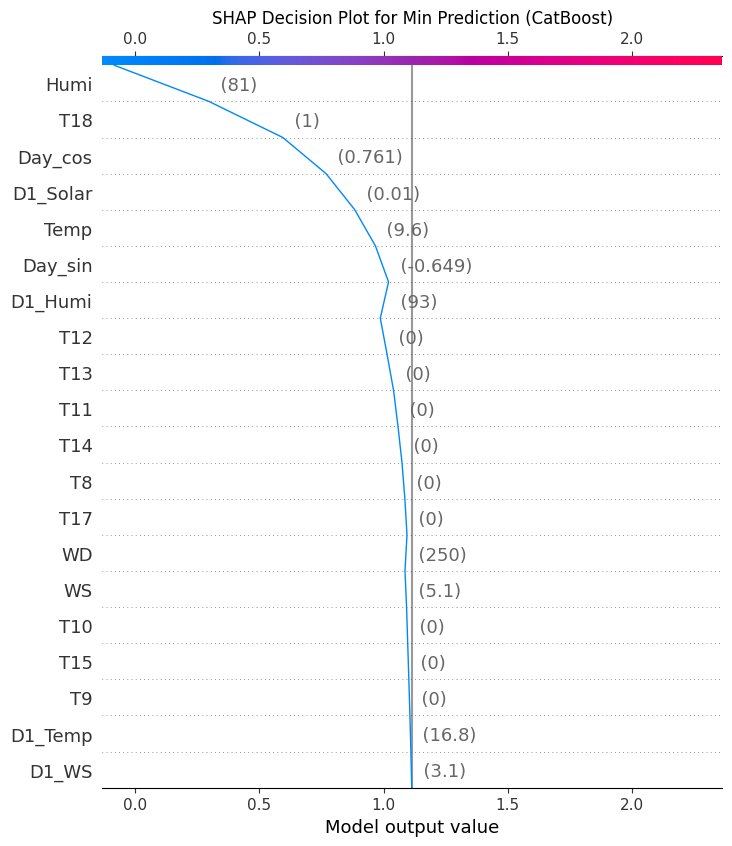

In [8]:
# 서울_catboost_decision 
decision_high_low_catboost(seoul_model_cat, X_test_rf_gbm, ctest, seoul_cat_explainer, "CatBoost", "./seoul_vis")

In [ ]:
#D1_Temp와  


plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_train_val_rf_gbm['D1_Temp'], 
    busan_cat_shap_values['D1_Temp'], 
    c=y_train_val_rf_gbm, 
    cmap='viridis', s=50, alpha=0.8
)
plt.colorbar(scatter, label='Solar Radiation')
plt.title('Dependence Plot: D1_Temp vs SHAP Value', fontsize=14)
plt.xlabel('D1_Temp (Temperature of Previous Day)', fontsize=12)
plt.ylabel('SHAP Value (Impact on Model)', fontsize=12)
plt.grid(alpha=0.3)

# Save to file instead of showing
plt.savefig('dependence_plot.png', dpi=100, bbox_inches='tight')
plt.close()

In [ ]:
shap.dependence_plot(ind = "D1_Temp", interaction_index = "Temp")